<a href="https://colab.research.google.com/github/JKJIN1999/MNIST_ANN/blob/main/MNIST_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple ANN for MNIST dataset**
### This project will explain how to build up a simple Neural Network model for MNIST dataset


### The process will be as 
1.  Download MNIST dataset
2.  Pre-set the Hyper-parameters for the model
3.  Manage the MNIST dataset for training and testing
4.  Create Neural Network Model for MNIST
5.  Initialize Training, Evaluating process
6.  Train the Model and Test



## 1.Download MNIST dataset

torch.Size([60000, 28, 28])
torch.Size([60000])


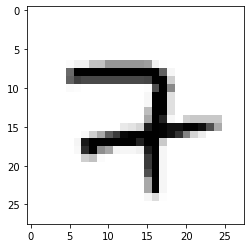

tensor(7)


In [87]:
import matplotlib.pyplot as plt
import torchvision
import random

mnist = torchvision.datasets.MNIST(root='./data', train=True, download=True)

print(mnist.data.size())
print(mnist.targets.size())

num = random.randint(1,50)

plt.imshow(mnist.data[num], cmap="Greys", interpolation= "nearest") 
#interpolation= "nearest" (Used to display image without trying to interpolate between pixels if the display resolution is not the same as the image resolution)
plt.show()
print(mnist.targets[num])

## 2.Pre-set the Hyper-parameters for the model

In [88]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
# cuda is possible or if not, use the cpu (Cuda is a paralle computing platform and application programming interface)
# if you see cpu as your result, please change your runtime to GPU 
print(device)

# 28*28 =784
input_size = 784 
# number of hidden layers
hidden_size = 500
#output label
num_classes = 10

num_epochs = 10
batch_size = 100
learning_rate =0.001
drop_prob = 0.5
weight_decay_lambda = 1e-4



cuda


## 3.Manage the MNIST dataset for training and testing

In [89]:
import torchvision.transforms as transforms

#Call Each train validation and testing dataset from MNIST
train_val_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

# #Train : Validation = 8 : 2
# amount = len(train_val_dataset)
# train_set = int(amount*0.8)
# validation_set = int(amount*0.2)

train_dataset, val_dataset = torch.utils.data.random_split(train_val_dataset, [50000,10000])
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# Call Dataloader for each dataset
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


# Note that MNIST datasets contain image and also the labels as well. 

## 4.Create Neural Network Model for MNIST

In [90]:
import torch.nn as nn

#Inherit the parent class nn.Module
class MNISTNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes, drop_prob):
      super().__init__()
      self.layer1 = nn.Linear(input_size, hidden_size)
      self.layer2 = nn.Linear(hidden_size, num_classes)
      self.activation_fn = nn.ReLU()
      self.dropout = nn.Dropout(drop_prob)

  def forward(self,x):
      out = self.layer1(x)
      out = self.activation_fn(out)
      out = self.dropout(out)
      out = self.layer2(out)
      return out

# What .to(device) do 
# On calling forward it splits the input into multiple chunks (one chunk per GPU), 
# replicates the underlying model to multiple GPUs, runs forward on each of them, 
# and gathers the outputs.

model = MNISTNet(input_size, hidden_size, num_classes, drop_prob).to(device)
criterion = nn.CrossEntropyLoss()
# Weight_decay decreasese the overfitting by keepin the weights small
# Another different example for this is ResNet where Residual Learning adds exact x into F(x) so the weight can always at least have 1 after each backpropogation 
# However, the residual learning is not used for overfitting, but to prevent the weight decreasing to 0 caused by prolonged training
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay=weight_decay_lambda)

## 5.Initialize Training, Evaluating process

In [91]:
def train (train_loader, model, criterion, optimizer):
  loss_array = []
  # simply to notify your model that your training ( ! dropout or batchnorm act different from each train and test )
  model.train()

  for i, (images, labels) in enumerate(train_loader):
    optimizer.zero_grad()

    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss_array.append(loss.item())
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print('loss: {}'.format(sum(loss_array)/len(loss_array)))
      loss_array = []

In [92]:
def evaluation(val_loader, model):
  correct = 0
  total = 0
  model.eval()
  for i , (images, labels) in enumerate(val_loader):
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
  
    # reduce memory usage 
    with torch.no_grad():
      outputs = model(images)
      # collect the maximum value from outputs and decrease 1 dim
      _,predicted = torch.max(outputs.data, 1)
      correct += (predicted==labels).sum().item()
      total += labels.size(0)
  return correct/total


## 6.Train the Model and Test

In [93]:
for _ in range(num_epochs):
  train(train_loader, model, criterion, optimizer)
  acc = evaluation(val_loader,model)
  print("accuracy : {}".format(acc))

evaluation(test_loader,model)

loss: 0.7610346075892448
loss: 0.3621300099790096
loss: 0.27759522303938866
loss: 0.2651833222806454
loss: 0.2215591612458229
accuracy : 0.9419
loss: 0.20000383123755455
loss: 0.18556306943297385
loss: 0.1842260693013668
loss: 0.1742337579280138
loss: 0.17089924827218056
accuracy : 0.9607
loss: 0.131922008022666
loss: 0.13982236426323652
loss: 0.13565645191818476
loss: 0.1410462599620223
loss: 0.13642106588929892
accuracy : 0.9668
loss: 0.11703393839299679
loss: 0.10889264103025198
loss: 0.11727977011352778
loss: 0.11050343006849289
loss: 0.11293064003810287
accuracy : 0.9718
loss: 0.10634728483855724
loss: 0.0926819565333426
loss: 0.10144630175083875
loss: 0.10271316774189472
loss: 0.09530718002468347
accuracy : 0.9731
loss: 0.08396233087405562
loss: 0.08739632673561573
loss: 0.09180301086977125
loss: 0.08895773969590665
loss: 0.09347226742655039
accuracy : 0.9748
loss: 0.07820609508082271
loss: 0.07688297932036221
loss: 0.0829094342328608
loss: 0.07911122439429163
loss: 0.08128946640

0.9794